In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pypfopt import hierarchical_portfolio

# boilerplate

In [2]:
def tyler(x):

    (1/(1+alpha))*p/n*np.sum( x*x.T, axis=1)

In [3]:
# def regularized_tylers_estimator(X, max_iter=100, tol=1e-5, gamma=0.5):
#     """
#     Compute the regularized Tyler's M-estimator for the covariance matrix.

#     Parameters
#     ----------
#     X : array-like, shape (n_samples, n_features)
#         The input data.

#     max_iter : int, optional (default=100)
#         The maximum number of iterations.

#     tol : float, optional (default=1e-5)
#         The tolerance for the stopping criterion.

#     gamma : float, optional (default=0.5)
#         The regularization parameter. Must be between 0 and 1.

#     Returns
#     -------
#     cov : array, shape (n_features, n_features)
#         The estimated covariance matrix.
#     """
#     n_samples, n_features = X.shape
#     cov = np.eye(n_features)  # Initialize covariance with identity matrix

#     # Compute the structured estimator
#     structured_cov = np.diag(np.var(X, axis=0))

#     for _ in range(max_iter):
#         # Compute the squared Mahalanobis distance
#         dist = np.sum(np.dot(X, np.linalg.inv(cov)) * X, axis=1)
        
#         # Update the covariance matrix
#         new_cov = np.dot(X.T, X / dist[:, np.newaxis]) / n_features

#         # Regularize the covariance matrix
#         new_cov = gamma * new_cov + (1 - gamma) * structured_cov

#         # Check for convergence
#         if np.linalg.norm(new_cov - cov) < tol:
#             break

#         cov = new_cov

#     return cov

# def regularized_tylers_estimator(X, max_iter=100, tol=1e-5, gamma=0.5):
#     """
#     Compute the regularized Tyler's M-estimator for the covariance matrix.

#     Parameters
#     ----------
#     X : array-like, shape (n_samples, n_features)
#         The input data.

#     max_iter : int, optional (default=100)
#         The maximum number of iterations.

#     tol : float, optional (default=1e-5)
#         The tolerance for the stopping criterion.

#     gamma : float, optional (default=0.5)
#         The regularization parameter. Must be between 0 and 1.

#     Returns
#     -------
#     cov : array, shape (n_features, n_features)
#         The estimated covariance matrix.
#     """
#     n_samples, n_features = X.shape
#     cov = np.eye(n_features)  # Initialize covariance with identity matrix

#     # Compute the structured estimator
#     structured_cov = np.diag(np.var(X, axis=0))

#     for _ in range(max_iter):
#         # Compute the squared Mahalanobis distance
#         dist = np.sum(np.dot(X, np.linalg.inv(cov)) * X, axis=1)
        
#         # Update the covariance matrix
#         new_cov = np.dot(X.T, X / dist[:, np.newaxis]) / n_samples

#         # Regularize the covariance matrix
#         new_cov = gamma * new_cov + (1 - gamma) * structured_cov

#         # Check for convergence
#         if np.linalg.norm(new_cov - cov) < tol:
#             break

#         cov = new_cov

#     return cov

def regularized_tylers_estimator(X, max_iter=100, tol=1e-5, gamma=0.5):
    """
    Compute the regularized Tyler's M-estimator for the covariance matrix.

    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        The input data.

    max_iter : int, optional (default=100)
        The maximum number of iterations.

    tol : float, optional (default=1e-5)
        The tolerance for the stopping criterion.

    gamma : float, optional (default=0.5)
        The regularization parameter. Must be between 0 and 1.

    Returns
    -------
    cov : array, shape (n_features, n_features)
        The estimated covariance matrix.
    """
    n_samples, n_features = X.shape
    cov = np.eye(n_features)  # Initialize covariance with identity matrix

    # Compute the structured estimator
    structured_cov = np.diag(np.var(X, axis=0))

    for _ in range(max_iter):
        # Compute the squared Mahalanobis distance
        dist = np.sum(np.dot(X, np.linalg.inv(cov)) * X, axis=1)
        
        # Update the covariance matrix
        new_cov = np.dot(X.T, X / dist[:, np.newaxis]) / n_samples

        # Regularize the covariance matrix
        new_cov = gamma * new_cov + (1 - gamma) * structured_cov

        # Check for convergence
        if np.linalg.norm(new_cov - cov) < tol:
            break

        cov = new_cov

    return cov



In [4]:
# def find_co_integretables(df, p=0.05):
#     from statsmodels.tsa.stattools import adfuller
#     from itertools import combinations

    
#     significant_pairs = []

#     # Get all combinations of time series
#     for series1, series2 in combinations(df.columns, 2):
#         series1_data = df[series1]
#         series2_data = df[series2]
        
#         # Calculate the differences between the two series
#         difference = series1_data - series2_data
        
#         # If the difference is a constant, skip this pair
#         if difference.nunique() <= 1:
#             continue

#         try:
#             # Run the adfuller test on the difference
#             adf_result = adfuller(difference)
#             # If the p-value is below the specified threshold, we consider the result statistically significant
#             if adf_result[1] < p:
#                 significant_pairs.append((series1, series2))
#         except ValueError:
#             continue  # skip this pair if the ADF test raises a ValueError
        
#         # adf_result[0] is the test statistic, adf_result[1] is the p-value.
#         # If the p-value is below 0.05, we consider the result statistically significant
#         if adf_result[1] < p:
#             significant_pairs.append((series1, series2))

#     # Print pairs of series with statistically significant results
#     for pair in significant_pairs:
#         print(f"The pair {pair} has a statistically significant result.")
        
#     return significant_pairs
        
def find_co_integretables(df, p=0.05):
    from statsmodels.tsa.stattools import adfuller
    from itertools import combinations

    significant_pairs = []

    # Get all combinations of time series
    for series1, series2 in combinations(df.columns, 2):
        series1_data = df[series1]
        series2_data = df[series2]
        
        # Calculate the differences between the two series
        difference = series1_data - series2_data
        
        # If the difference is a constant, skip this pair
        if difference.nunique() <= 1:
            continue

        try:
            # Run the adfuller test on the difference
            adf_result = adfuller(difference)
            # If the p-value is below the specified threshold, we consider the result statistically significant
            if adf_result[1] < p:
                significant_pairs.append((series1, series2))
        except ValueError:
            continue  # skip this pair if the ADF test raises a ValueError

    # Print pairs of series with statistically significant results
    for pair in significant_pairs:
        print(f"The pair {pair} has a statistically significant result.")
        
    return significant_pairs


In [5]:
# functions
def optimize_dataframe(df):
    optimized_df = pd.DataFrame()

    for col in df.columns:
        col_data = df[col]
        dtype = col_data.dtype

        if dtype == object:
            # If dtype is object, convert to category if less than 50% unique
            num_unique_values = len(col_data.unique())
            num_total_values = len(col_data)
            if num_unique_values / num_total_values < 0.5:
                optimized_df[col] = col_data.astype('category')
            else:
                optimized_df[col] = col_data
        elif dtype == int:
            # If dtype is int, check if it can be converted to smaller int dtype
            if col_data.min() >= 0:
                if col_data.max() < 2**8:
                    optimized_df[col] = col_data.astype('uint8')
                elif col_data.max() < 2**16:
                    optimized_df[col] = col_data.astype('uint16')
                elif col_data.max() < 2**32:
                    optimized_df[col] = col_data.astype('uint32')
                else:
                    optimized_df[col] = col_data.astype('uint64')
            else:
                if col_data.min() > np.iinfo(np.int8).min and col_data.max() < np.iinfo(np.int8).max:
                    optimized_df[col] = col_data.astype('int8')
                elif col_data.min() > np.iinfo(np.int16).min and col_data.max() < np.iinfo(np.int16).max:
                    optimized_df[col] = col_data.astype('int16')
                elif col_data.min() > np.iinfo(np.int32).min and col_data.max() < np.iinfo(np.int32).max:
                    optimized_df[col] = col_data.astype('int32')
                else:
                    optimized_df[col] = col_data.astype('int64')
        elif dtype == float:
            # If dtype is float, check if it can be converted to smaller float dtype
            if col_data.min() > np.finfo(np.float16).min and col_data.max() < np.finfo(np.float16).max:
                optimized_df[col] = col_data.astype('float16')
            elif col_data.min() > np.finfo(np.float32).min and col_data.max() < np.finfo(np.float32).max:
                optimized_df[col] = col_data.astype('float32')
            else:
                optimized_df[col] = col_data.astype('float64')
        else:
            optimized_df[col] = col_data

    return optimized_df

def ffill_numerical(df):
    for col in df.columns:
        col_data = df[col]
        dtype = col_data.dtype
    
        if np.issubdtype(dtype, np.number):
            df[col] = df[col].fillna(method = 'ffill',)
    return df

def create_lagged_variables(df, var_list, n_lags):
    for var in var_list:
        for i in range(1, n_lags+1):
            col_name = f"{var}_lag{i}"
            df[col_name] = df[var].shift(i)
    return df


In [6]:
df = pd.read_parquet('OSEBX_data.parquet')
df['Date'] = pd.to_datetime(df['Date'])
# df['Close'] = df.groupby('Symbol')['Close']
#df=optimize_dataframe(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643743 entries, 0 to 1643742
Data columns (total 53 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   Date                        1643743 non-null  datetime64[ns]
 1   SecurityId                  1643743 non-null  int64         
 2   CompanyId                   1643612 non-null  float64       
 3   Symbol                      1643743 non-null  object        
 4   ISIN                        1643743 non-null  object        
 5   Name                        1643743 non-null  object        
 6   BestBidPrice                1630328 non-null  float64       
 7   BestAskPrice                1624643 non-null  float64       
 8   Open                        1521506 non-null  float64       
 9   High                        1643732 non-null  float64       
 10  Low                         1643732 non-null  float64       
 11  Close                   

In [7]:
tickers = df['Symbol'].unique()

In [8]:
df2 = df[['Symbol','Date','Close']].pivot_table(columns='Symbol', index='Date', values='Close')
# Assuming df is your DataFrame
df2 = df2.dropna(how='all')  # Drop rows where all cells are NaN
df2 = df2.dropna(how='all', axis=1)  # Drop columns where all cells are NaN

# Assuming df is your DataFrame
columns_with_fewest_nans = df2.isnull().sum().nsmallest(40).index.tolist()

# Create a new DataFrame with only these columns
df2 = df2[columns_with_fewest_nans]
df2 = df2.fillna(method='ffill').dropna()
df2

Symbol,NHY,ORK,STB,DNO,TOM,WWI,BON,HNA,ODF,OLT,...,SPOG,JIN,PRS,WWIB,FRO,EKO,REACH,TGS,KIT,SUBC
Date,,,,,,,,,,,,,,,,,,,,,
1997-10-30,395.00,653.00,51.50,35.000,178.0,325.0,485.0,42.0,160.0,235.0,...,164.0,5.00,158.000,320.0,35.00,64.5,15.00,94.00,69.60,460.00
1997-10-31,385.50,643.00,52.00,34.500,180.0,345.0,490.0,42.5,160.0,232.0,...,164.0,5.00,160.000,340.0,35.30,64.0,15.00,94.00,71.36,460.00
1997-11-03,389.00,640.00,51.00,35.900,188.0,345.0,485.0,42.0,159.0,232.0,...,159.0,5.25,165.000,339.0,36.70,69.0,15.00,96.00,73.13,460.00
1997-11-04,383.00,630.00,51.00,35.800,188.0,336.0,475.0,42.0,159.0,242.0,...,161.0,5.40,164.000,339.0,37.00,68.0,15.00,94.00,71.61,460.00
1997-11-05,389.00,635.00,51.50,36.100,190.0,339.0,490.0,41.5,160.0,242.0,...,159.0,5.50,166.500,330.0,37.60,66.0,15.10,85.00,73.62,455.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,36.01,85.52,63.00,5.900,370.2,160.5,229.0,103.5,24.5,151.5,...,48.6,3.50,0.816,159.0,64.00,137.6,2.02,124.20,18.70,83.16
2020-11-24,37.63,84.04,65.46,6.248,371.6,158.0,227.0,103.5,24.7,152.5,...,48.8,3.70,1.200,157.0,65.70,137.6,2.20,136.30,18.36,88.10
2020-11-25,36.55,84.86,64.76,6.246,376.8,159.0,228.5,103.5,24.6,154.0,...,48.7,3.80,1.022,157.0,60.00,137.6,2.18,138.25,18.14,86.50


# Speadtrading

In [9]:
len = 2000
end = 1500
co_int = find_co_integretables(df2.iloc[-len:-end], p=0.001)

The pair ('WWI', 'WWIB') has a statistically significant result.
The pair ('ELK', 'REACH') has a statistically significant result.
The pair ('KVE', 'REACH') has a statistically significant result.
The pair ('KVI', 'REACH') has a statistically significant result.


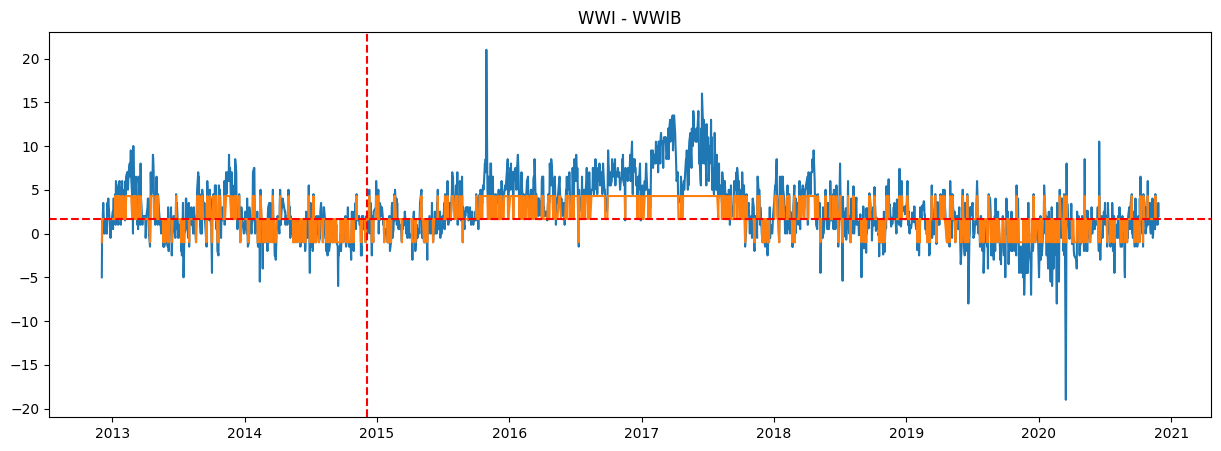

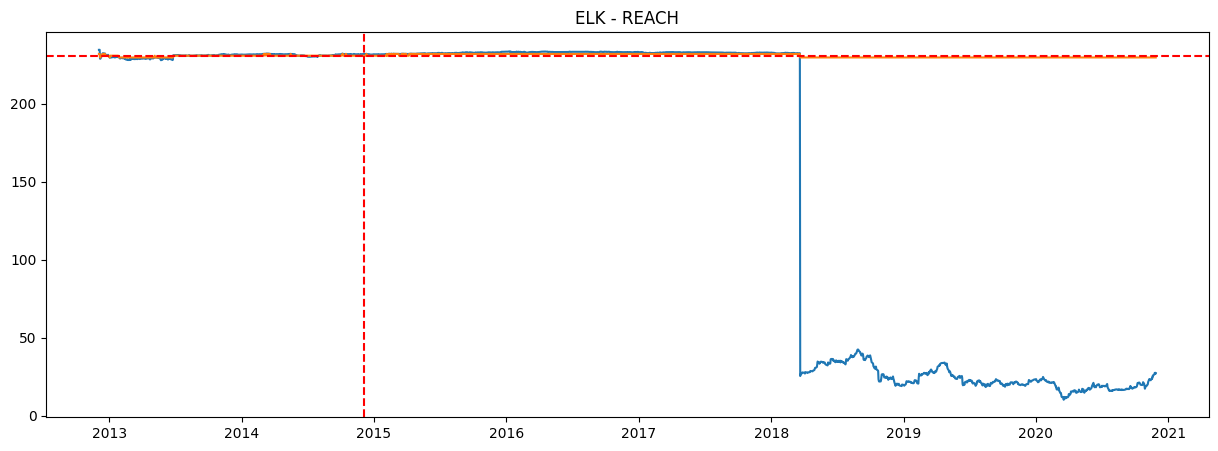

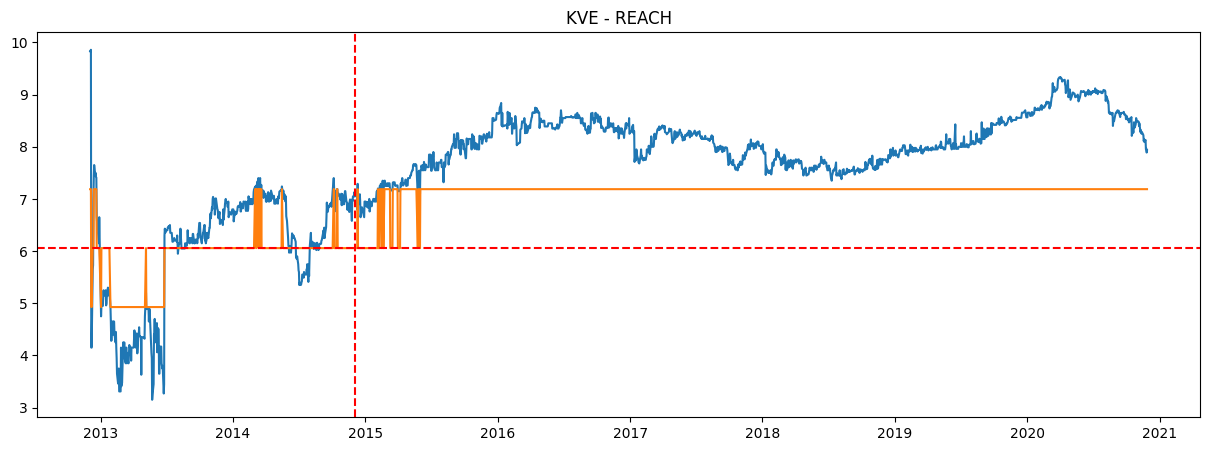

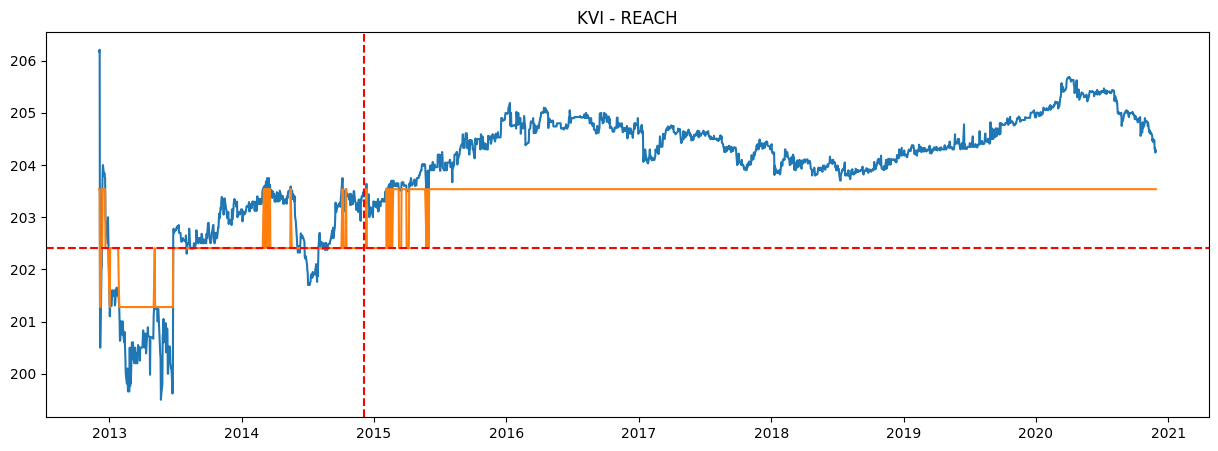

In [10]:
for i in co_int:
    x, y = i

    if (df2[x]-df2[y]).iloc[-len:-end].mean() < 0:
        x, y = y, x
        
    asset = (df2[x]-df2[y]).iloc[-len:]
    asset_mean = asset.iloc[:(len-end)].mean()
    asset_std = asset.iloc[:(len-end)].std()
    signal = np.where(asset>=asset_mean+asset_std,asset_mean+asset_std, np.where(asset<=asset_mean-asset_std,asset_mean-asset_std, asset_mean))
    plt.figure(figsize=(15,5))
    plt.plot(df2.index[-len:],asset)
    plt.plot(df2.index[-len:], signal)
    plt.axhline((asset_mean), c='r', linestyle='--')
    plt.axvline(df2.index[-end], c='r', linestyle='--')
    plt.title(x + ' - ' + y)
    plt.show()
    
    # ax = asset.plot.density()
    # asset.plot(kind='hist', bins=50, ax=ax, density=True)
    # plt.title(x + ' - ' + y)
    # plt.show()


# Portfolio optimization

In [11]:
scov= df2.cov()
scov.style.background_gradient(cmap='coolwarm')

Symbol,NHY,ORK,STB,DNO,TOM,WWI,BON,HNA,ODF,OLT,VEI,GRO,ATEA,HNB,SCH,DNB,PGS,FAR,ELK,NSG,BLO,ASC,MORG,KOG,GOD,KVE,MING,NONG,KVI,NOR,SPOG,JIN,PRS,WWIB,FRO,EKO,REACH,TGS,KIT,SUBC
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NHY,36924.773027,12642.529152,1156.248857,1578.257752,-270.936862,1228.153032,15856.890597,-2057.032973,9222.893615,-13075.450239,3939.383861,16901.365057,-3247.739573,-2589.774343,-7480.528162,-4318.254515,12634.027468,-1274.900041,-414.483026,13031.028736,-890.500040,-43.242600,850.538189,-3539.596842,-329.535239,7655.968504,11926.824956,8952.092214,-6645.935567,-1619.412687,10577.937006,-318.812530,11475.571984,526.283324,7357.173658,-348.648510,205.286432,509.996240,240.502123,-1624.094618
ORK,12642.529152,13532.185820,853.055134,615.488390,928.891859,2655.670402,8203.058450,-174.733762,3417.620092,-4496.171992,5160.908187,8419.422772,2000.711091,-347.688016,-2190.851575,-1375.353429,9679.265856,-513.355409,-945.051669,5704.513278,216.111557,18.655924,766.336970,-1299.647929,55.736561,3553.862586,4565.817518,3779.414696,602.784908,-367.666038,4532.369043,-86.103580,5953.289773,2360.350594,2346.676578,-48.025062,227.843954,-9.969000,451.791246,2012.721052
STB,1156.248857,853.055134,296.949602,52.850954,613.102034,437.713714,966.100356,274.501727,281.566018,-937.444890,549.759120,732.433666,189.619440,264.973013,133.701660,154.552418,682.612389,-196.051568,-397.605327,581.838030,187.978375,17.370890,445.229967,79.417672,-12.889955,340.253896,419.363257,436.354535,61.528639,639.397675,511.970671,51.628269,511.438986,380.356202,467.288846,162.877130,17.381385,350.955503,40.335012,258.967078
DNO,1578.257752,615.488390,52.850954,117.669028,-48.118589,143.601638,883.591607,-84.741746,369.371801,-354.288179,234.518531,894.213998,-83.817056,-98.254258,-63.579968,-96.691463,730.281901,-37.346479,0.483954,451.959663,-22.392596,-0.080869,112.423402,-173.341113,-4.316764,252.177412,486.326735,302.353771,-159.891674,-22.476500,467.898113,-5.120226,553.010246,111.296600,305.373924,15.120063,12.676585,272.002574,9.183402,-11.301916
TOM,-270.936862,928.891859,613.102034,-48.118589,8536.189821,380.258502,344.711428,377.484972,-892.379489,-15187.578406,1160.523460,-1592.998489,2523.242832,182.669691,1046.306239,879.383204,-1115.540377,-3394.871031,-5386.216637,3030.509963,713.744067,-121.585502,773.656700,-1009.486172,135.262527,1594.275256,1570.457907,346.695502,621.857776,3436.187729,-551.165080,-559.133340,-1611.903888,451.368075,-3246.015649,-161.831825,54.559731,344.337777,404.122249,758.421367
WWI,1228.153032,2655.670402,437.713714,143.601638,380.258502,2850.437426,2233.357950,541.864039,169.861370,1002.571007,1869.753387,2189.236264,1293.075941,564.713438,1338.054517,495.001127,2921.535672,-46.278111,258.487040,622.848219,518.583119,50.261582,679.804790,366.147115,109.943581,665.125582,324.517849,249.549695,2008.714936,909.006985,891.673847,199.254731,985.085471,2683.056447,-2.126845,237.782490,101.177937,776.360564,136.381278,1311.738100
BON,15856.890597,8203.058450,966.100356,883.591607,344.711428,2233.357950,14623.964468,521.186837,3157.330973,5830.642281,3907.294067,13485.017752,-502.793092,438.894475,-1515.998405,-1111.974810,8848.108966,1302.936112,48.969374,4025.391863,95.241797,110.470846,1840.402179,378.292022,-84.076403,2461.314768,3421.430412,3181.645306,864.805721,-918.018297,5206.151145,422.714269,6605.072513,1809.371102,5872.578913,530.132346,164.356525,2476.684970,204.983155,1225.840946
HNA,-2057.032973,-174.733762,274.501727,-84.741746,377.484972,541.864039,521.186837,912.790749,-619.566229,1261.196402,508.898711,-150.684637,330.965153,1000.934770,1031.377854,761.082742,-371.433378,91.316968,-193.560917,-1226.717851,456.021489,60.805286,852.723500,1119.941334,-15.288449,-676.158330,-1129.354607,-497.881158,1020.730416,1067.986252,-193.393630,226.112362,-202.165002,489.319736,747.235808,400.332497,-6.274868,614.324635,-2.849889,348.613301
ODF,9222.893615,3417.620092,281.566018,369.371801,-892.379489,1

Convetional Covariance matrix

In [12]:
prices = df2.to_numpy()
tyler_cov = regularized_tylers_estimator(prices, max_iter=1000, tol=1e-5, gamma=0.9)
pd.DataFrame(tyler_cov, columns=df2.columns, index=df2.columns).style.background_gradient(cmap='coolwarm')

Symbol,NHY,ORK,STB,DNO,TOM,WWI,BON,HNA,ODF,OLT,VEI,GRO,ATEA,HNB,SCH,DNB,PGS,FAR,ELK,NSG,BLO,ASC,MORG,KOG,GOD,KVE,MING,NONG,KVI,NOR,SPOG,JIN,PRS,WWIB,FRO,EKO,REACH,TGS,KIT,SUBC
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NHY,3757.053643,30.037388,9.504130,3.900107,19.250674,28.212544,38.940387,9.354508,23.277018,57.166828,16.291193,36.488079,6.437602,8.068132,25.705066,9.662879,24.267934,10.635886,33.252263,28.007840,2.992792,0.798331,40.100580,20.757036,0.684422,17.374467,33.468167,28.594497,20.661047,10.995299,26.390044,1.593313,23.606439,26.888025,23.999752,18.118237,0.586107,23.512383,1.231161,13.943139
ORK,30.037388,1372.605007,5.948692,2.091030,12.305837,19.029974,22.921709,7.158270,11.717249,42.708556,11.665013,20.678263,6.466339,6.590981,19.646469,7.888372,15.147599,7.459307,21.477171,13.344821,2.570878,0.583658,25.765927,14.421594,0.624251,8.523252,16.936063,15.136642,17.625327,7.529822,14.024690,1.250507,12.915486,18.319809,13.814110,11.890489,0.391867,15.648060,0.835520,10.656689
STB,9.504130,5.948692,32.209337,0.757338,5.563087,7.993965,8.600048,3.334396,3.989239,19.590952,4.253336,7.404628,2.885217,3.143561,9.247914,3.929410,4.830476,3.290504,9.081108,4.364065,1.236914,0.256438,10.992007,6.505153,0.280939,2.785060,5.999057,5.500795,8.124163,3.675884,4.865093,0.604381,4.067134,7.755997,5.321274,5.168236,0.136521,7.034024,0.311151,4.676194
DNO,3.900107,2.091030,0.757338,12.075566,1.544363,2.524114,2.977102,0.908513,1.509077,6.088995,1.336894,2.689403,0.773113,0.838695,2.889487,1.122260,1.819761,1.058914,2.974209,1.618908,0.313810,0.076007,3.452068,1.919122,0.089258,1.007458,2.198216,1.888799,2.352981,0.983917,1.778044,0.174636,1.573116,2.435896,1.765367,1.602392,0.047400,2.283391,0.091009,1.361181
TOM,19.250674,12.305837,5.563087,1.544363,872.125392,16.992754,17.916021,7.195522,7.495445,30.134208,9.608438,13.995282,7.877129,6.608884,20.864963,8.934782,8.691634,4.339008,15.542045,11.488254,3.053827,0.432842,23.655084,13.184502,0.742680,7.041514,13.690752,11.536650,17.762162,9.841629,9.619830,0.786585,6.948313,16.564284,8.274308,10.680388,0.319756,14.977370,0.926625,10.145257
WWI,28.212544,19.029974,7.993965,2.524114,16.992754,314.023861,28.008873,11.286503,12.446682,73.738676,14.540969,24.485762,10.421169,10.751316,33.602396,13.809448,16.623028,12.262998,33.227019,12.537965,4.145025,0.898968,37.113855,22.738100,1.130757,8.525816,18.630041,16.989688,30.217819,11.355482,15.481278,2.185329,12.820540,28.214956,16.655439,17.676731,0.496997,24.065666,0.980109,16.165035
BON,38.940387,22.921709,8.600048,2.977102,17.916021,28.008873,1498.587202,11.354914,15.246099,78.586409,15.312378,32.118592,8.983548,10.664562,30.683895,12.406193,20.605554,13.582420,33.038003,16.190026,3.706169,0.929385,38.373641,23.256357,0.939917,10.244355,21.803610,20.130957,28.977882,10.223602,18.811291,2.368788,16.744332,27.082665,21.851292,18.054255,0.525922,24.542000,1.067176,16.341073
HNA,9.354508,7.158270,3.334396,0.908513,7.195522,11.286503,11.354914,96.439869,4.505764,30.624098,5.820078,9.368108,4.280645,5.022996,13.840539,6.056123,5.751520,5.072046,13.302375,3.887510,1.925546,0.396124,15.616401,10.110639,0.413601,2.665082,6.593213,6.456345,12.769284,5.196947,5.819673,0.994275,4.680336,10.990661,7.551845,7.448739,0.169920,9.985937,0.389099,6.623411
ODF,23.277018,11.717249,3.989239,1.509077,7.495445,12.446682,15.246099,4.505764,356.987721,30.543362,6.573019,14.089492,3.107633,4.067432,12.369374,4.818494,10.105346,5.579378,15.559829,9.987922,1.369397,0.389864,17.804945,10.020603,0.328376,6.249093,12.871664,11.569576,10.376107,4.707128,10.349215,0.897287,9.079162,11.957988,10.798820,8.333363,0.228830,10.159823,0.479253,6.401852


# Hierarchical Risk Parity Model

In [13]:
sw = hierarchical_portfolio.HRPOpt(df2.pct_change(), cov_matrix=scov).optimize()
print(sw)
ret = ((1 + df2.pct_change()).cumprod()) - 1
print(calculate_sharpe_ratio((ret*sw).sum(axis=1), 0))
# (sret*sw).plot(figsize=(15,5))
# plt.show()
# (sret*sw).sum(axis=1).plot(figsize=(15,5))
# plt.show()

OrderedDict([('ASC', 0.01726865523823485), ('ATEA', 0.0030443528929105846), ('BLO', 4.040157094929641e-05), ('BON', 0.02216839003008835), ('DNB', 0.015598441303324969), ('DNO', 0.006343817393671448), ('EKO', 0.05790989790270909), ('ELK', 0.08463094248664906), ('FAR', 0.03989923879082849), ('FRO', 0.0028909828064446), ('GOD', 0.0012113950216282295), ('GRO', 0.025561312502146973), ('HNA', 0.03493737712752649), ('HNB', 0.03901736128343545), ('JIN', 0.007211335355015553), ('KIT', 2.4539380914409473e-06), ('KOG', 0.03314622857646702), ('KVE', 0.05028851755110482), ('KVI', 0.0008455815305155693), ('MING', 0.02723630644493387), ('MORG', 0.12128456719315411), ('NHY', 0.012293927091359408), ('NONG', 0.02490109526842328), ('NOR', 1.751531156398978e-05), ('NSG', 0.00841354906409142), ('ODF', 0.04945837329196047), ('OLT', 0.07170709784719957), ('ORK', 0.017427214727511475), ('PGS', 0.00029674406892996784), ('PRS', 3.119569078798747e-05), ('REACH', 0.00015044071248552395), ('SCH', 0.016074386062042

NameError: name 'calculate_sharpe_ratio' is not defined

In [ ]:
# Portfolio optimaziation using Tyler's estimator
tw = hierarchical_portfolio.HRPOpt(df2.pct_change(), cov_matrix=tyler_cov).optimize()
print(tw)
print(calculate_sharpe_ratio((ret*tw).sum(axis=1), 0))
# (sret*sw).plot(figsize=(15,5))
# plt.show()
# (sret*sw).sum(axis=1).plot(figsize=(15,5))
# plt.show()

OrderedDict([('ASC', 0.01726865523823485), ('ATEA', 0.0030443528929105846), ('BLO', 4.040157094929641e-05), ('BON', 0.02216839003008835), ('DNB', 0.015598441303324969), ('DNO', 0.006343817393671448), ('EKO', 0.05790989790270909), ('ELK', 0.08463094248664906), ('FAR', 0.03989923879082849), ('FRO', 0.0028909828064446), ('GOD', 0.0012113950216282295), ('GRO', 0.025561312502146973), ('HNA', 0.03493737712752649), ('HNB', 0.03901736128343545), ('JIN', 0.007211335355015553), ('KIT', 2.4539380914409473e-06), ('KOG', 0.03314622857646702), ('KVE', 0.05028851755110482), ('KVI', 0.0008455815305155693), ('MING', 0.02723630644493387), ('MORG', 0.12128456719315411), ('NHY', 0.012293927091359408), ('NONG', 0.02490109526842328), ('NOR', 1.751531156398978e-05), ('NSG', 0.00841354906409142), ('ODF', 0.04945837329196047), ('OLT', 0.07170709784719957), ('ORK', 0.017427214727511475), ('PGS', 0.00029674406892996784), ('PRS', 3.119569078798747e-05), ('REACH', 0.00015044071248552395), ('SCH', 0.016074386062042

[]

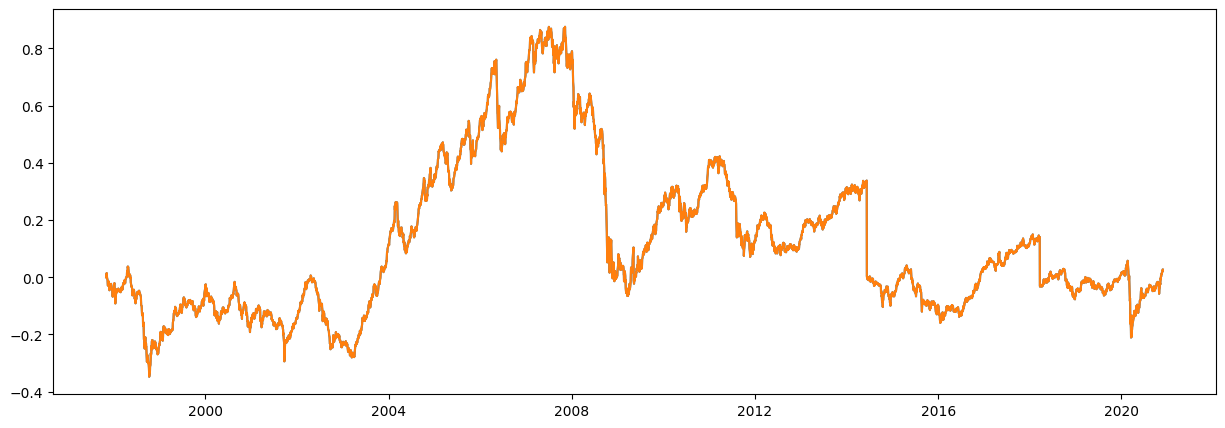

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(ret.index,(ret*sw).sum(axis=1))
plt.plot(ret.index,(ret*tw).sum(axis=1))
plt.plot()

# Efficient frontier max sharpe

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

In [ ]:
ef = EfficientFrontier(expected_returns, cov_matrix)  # setup
ef.add_objective(objective_functions.L2_reg)  # add a secondary objective
ef.min_volatility()  # find the portfolio that minimises volatility and L2_reg

NameError: name 'expected_returns' is not defined

In [ ]:
np.squeeze(df2.pct_change().dropna().to_numpy()).shape

(5791, 40)

In [ ]:
np.squeeze(scov.to_numpy()).shape

(40, 40)

In [ ]:
tyler_cov.shape

(40, 40)

In [ ]:
tef = EfficientFrontier(df2.pct_change().dropna().to_numpy().T, cov_matrix=tyler_cov)
tef.min_volatility()

OrderedDict([(0, 0.0),
             (1, 0.0),
             (2, 0.003814317685801),
             (3, 0.0238402721481856),
             (4, 0.0),
             (5, 0.0),
             (6, 0.0),
             (7, 0.0001200526830665),
             (8, 0.0),
             (9, 0.0),
             (10, 0.0),
             (11, 0.0),
             (12, 0.0001456647920563),
             (13, 0.0002408363791418),
             (14, 0.0),
             (15, 0.0),
             (16, 0.0),
             (17, 0.0),
             (18, 0.0),
             (19, 0.0),
             (20, 0.0048092748276665),
             (21, 0.3809805856782166),
             (22, 0.0),
             (23, 0.0),
             (24, 0.1126414863378047),
             (25, 0.0003269050534935),
             (26, 0.0),
             (27, 0.0),
             (28, 0.0),
             (29, 6.52693400102e-05),
             (30, 0.0),
             (31, 0.0150460758412989),
             (32, 0.0),
             (33, 0.0),
             (34, 0.0),
       

In [ ]:
sef = EfficientFrontier(df2.pct_change().dropna().to_numpy().T, cov_matrix=scov.to_numpy())
sef.min_volatility()

OrderedDict([(0, 0.0),
             (1, 0.0),
             (2, 0.0),
             (3, 0.0),
             (4, 0.0036351381771393),
             (5, 0.0),
             (6, 0.0),
             (7, 0.0),
             (8, 0.0),
             (9, 0.0),
             (10, 0.0),
             (11, 0.0),
             (12, 0.0),
             (13, 0.0),
             (14, 0.0),
             (15, 0.0),
             (16, 0.0),
             (17, 0.0),
             (18, 0.0),
             (19, 0.0),
             (20, 0.0),
             (21, 0.5927649398181777),
             (22, 0.0),
             (23, 0.0),
             (24, 0.1321957256313882),
             (25, 0.0),
             (26, 0.0055954644591396),
             (27, 0.0),
             (28, 0.0),
             (29, 0.0008708738565991),
             (30, 0.0),
             (31, 0.0),
             (32, 0.0),
             (33, 0.0),
             (34, 0.0),
             (35, 0.0),
             (36, 0.2635548825175426),
             (37, 0.0),
        

# Någe

In [ ]:
w = hierarchical_portfolio.HRPOpt(df2.pct_change(), cov_matrix).optimize()
print(w)
ret = ((1 + df2.pct_change()).cumprod()) - 1
print(calculate_sharpe_ratio((ret*w).sum(axis=1), 0))
(ret*w).plot(figsize=(15,5))
plt.show()
(ret*w).sum(axis=1).plot( figsize=(15,5))
plt.show()

NameError: name 'cov_matrix' is not defined

In [ ]:
print(df2.columns.tolist())

In [ ]:
db18 = po.loc[(po.index < '2019-01-01') & (po.index >= '2018-01-01')]
db19 = po.loc[(po.index < '2020-01-01') & (po.index >= '2019-01-01')]

In [ ]:
tickers = ['EQNR', 'DNB', 'AKERBP', 'TEL', 'NHY']
po = df2[tickers]

# fun

In [ ]:
w18 = hierarchical_portfolio.HRPOpt(db18.pct_change(), db18.cov()).optimize()
w19 = hierarchical_portfolio.HRPOpt(db19.pct_change(), db19.cov()).optimize()

NameError: name 'db18' is not defined

In [ ]:
print(w18)
print(w19)

In [ ]:
ret18 = (db18.pct_change()*w18).sum(axis=1)
ret19 = (db19.pct_change()*w19).sum(axis=1)

In [ ]:
calculate_sharpe_ratio(ret18, 0)

In [ ]:
calculate_sharpe_ratio(ret19, 0)

In [ ]:
def calculate_sharpe_ratio(portfolio_returns, risk_free_rate):
    """
    Calculate the Sharpe Ratio of a portfolio.
    
    Parameters:
    portfolio_returns : numpy array or pandas series
        Array or series of portfolio returns.
    risk_free_rate : float
        Risk-free rate of return.
    
    Returns:
    sharpe_ratio : float
        The Sharpe Ratio of the portfolio.
    """
    # Calculate the expected return of the portfolio
    expected_return = np.mean(portfolio_returns)
    
    # Calculate the standard deviation of the returns
    std_dev = np.std(portfolio_returns)
    
    # Calculate the Sharpe Ratio
    sharpe_ratio = (expected_return - risk_free_rate) / std_dev
    
    return sharpe_ratio
